Exploratory Data Analysis, EDA in short, is the first step taken during data analysis and modeling to better understand data and the relationship between the variables. The process also helps us clean the data; for example, most machine learning algorith cannot handle missing values, so we need to deal with them in the EDA, also we need to make sure all variables are in the right formats. In this notebook I perform EDA on the Western Nile Virus (WNV) dataset!

In [89]:
# Importing necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [39]:
# Load the data
datapath = os.path.join("data", 'mosquito_data.csv')
df = pd.read_csv(datapath)
df.head(7)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.921777,-87.632140
6,2019,39,11XX W ROOSEVELT RD,11,T048,GRAVID,2019-09-26 00:09:00,3,Res,negative,CULEX RESTUANS,41.866915,-87.654919


In [40]:
# Inspecting the dataframe
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()



The data has 18495 rows and 13 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


It looks like all variables are in the right format, except Date which should be a datetime object, so we will need to convert that. Also, the only variables with missing values are Latitude and Longitude, which can filled in by a quick google search!

In [41]:
df['Date'] = pd.to_datetime(df['Date']) # Converting the date to datetime format

df[df['Lat'].isna() & df['Lon'].isna()]['Address Block'].unique() # Checking addresses with missing lat and lon


array(['100XX W OHARE AIRPORT', '4XX W 127TH', '100XX W OHARE',
       '81XX S ASHLAND', '79XX S CHICAGO', '98XX S AVENUE G',
       '65XX N OAK PARK AVE', '115XX S AVENUE L', '30XX S HOYNE',
       '43XX N ASHLAND'], dtype=object)

In [42]:
# Filling in the missing lat and lon values according to the address

df.loc[df['Address Block'] == "100XX W OHARE AIRPORT", ['Lat', 'Lon']] = [41.982151, -87.897568]
df.loc[df['Address Block'] == "4XX W 127TH", ['Lat', 'Lon']] = [38.897469, -94.595230]
df.loc[df['Address Block'] == "100XX W OHARE", ['Lat', 'Lon']] = [40.177132, -85.477737]
df.loc[df['Address Block'] == "81XX S ASHLAND", ['Lat', 'Lon']] = [33.413078, -111.816238]
df.loc[df['Address Block'] == "79XX S CHICAGO", ['Lat', 'Lon']] = [42.094158, -79.266510]
df.loc[df['Address Block'] == "98XX S AVENUE G", ['Lat', 'Lon']] = [41.709293, -87.5315843]
df.loc[df['Address Block'] == "65XX N OAK PARK AVE", ['Lat', 'Lon']] = [42.015568, -87.794115]
df.loc[df['Address Block'] == "115XX S AVENUE L", ['Lat', 'Lon']] = [41.652009, -87.536241]
df.loc[df['Address Block'] == "30XX S HOYNE", ['Lat', 'Lon']] = [41.854498, -87.676803]
df.loc[df['Address Block'] == "43XX N ASHLAND", ['Lat', 'Lon']] = [40.861585, -82.321826]
# Note that this wouldn't be ideal if we had more missing addresses with missing Lat and Lon. This worked because we only only 10 were missing

Let's take a quick look on the data to see if everything is fixed now!

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              18495 non-null  float64       
 12  Lon              18495 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


Perfect the Date variable is now in the right format and looks like all the Lat and Lon are now all available. 

In [45]:
# checking for duplicates
is_duplicate = df.duplicated(keep = 'first')
print(f"There are {is_duplicate.sum()} duplicates in the data.")
# removing all duplicated rows
mosquito_df = df[~is_duplicate]
mosquito_df.duplicated(keep = 'first').sum()
print("The are now {} duplicates in the data.".format(mosquito_df.duplicated(keep = 'first').sum()))


There are 658 duplicates in the data.
The are now 0 duplicates in the data.


Now let's take another look at the data

In [46]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  int64         
 1   Week             17837 non-null  int64         
 2   Address Block    17837 non-null  object        
 3   Block            17837 non-null  int64         
 4   Trap             17837 non-null  object        
 5   Trap type        17837 non-null  object        
 6   Date             17837 non-null  datetime64[ns]
 7   Mosquito number  17837 non-null  int64         
 8   Mosquito ID      17837 non-null  object        
 9   WNV Present      17837 non-null  object        
 10  Species          17837 non-null  object        
 11  Lat              17837 non-null  float64       
 12  Lon              17837 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.9+ MB


Perfect. Looks like our data is ready for basic exploration. All variables are in their correct formats, no null values, and we know that all duplicates have been appropriately dealth with. Now let's start with exploring numeric variables!

In [47]:
numeric = mosquito_df.select_dtypes(include = ['int64', 'float64']).columns
numeric

Index(['Year', 'Week', 'Block', 'Mosquito number', 'Lat', 'Lon'], dtype='object')

In [79]:
mosquito_df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,17837.0,2012.850591,3.733999,2007.000000,2010.000000,2013.000000,2016.000000,2019.000000
Week,17837.0,30.979088,4.377505,20.000000,28.000000,31.000000,34.000000,40.000000
Block,17837.0,52.864383,36.318698,1.000000,22.000000,50.000000,81.000000,132.000000
Mosquito number,17837.0,10.458822,13.182843,1.000000,2.000000,4.000000,13.000000,50.000000
Lat,17837.0,41.737986,0.787922,33.413078,41.733188,41.867599,41.962015,42.094158
Lon,17837.0,-87.882636,2.243511,-111.816238,-87.778234,-87.702181,-87.643076,-79.266510


From the above output, here are the key observations:
- The data spans from 2007 to 2019
- The mosquito data was mostly collected between week 20 and week 40 of the year. That's from mid-May to October!
- The maximum number of mosquitoes per trap is 50, the minimum being 1 and the average mosquitoes per trap is 10.46 mosquitoes
- The mean number of mosquitoes is larger than median,meaning mosquito number is right skewed

We can also vizulalize this as below!

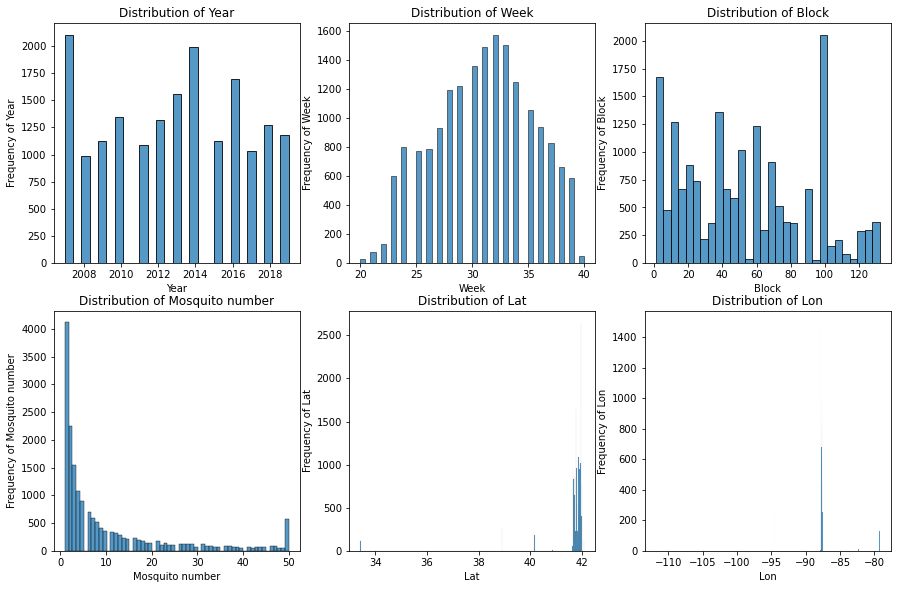

In [57]:
plt.subplots(2, 3, figsize = (15, 15))
counter = 1
for col in list(numeric):
    plt.subplot(3, 3, counter)
    sns.histplot(mosquito_df[col])
    plt.title(f"Distribution of {col}")
    plt.ylabel(f"Frequency of {col}")
    counter += 1


Additional observations:
- Most mosquito samples in 2007 and 2014
- Most samples collected between week 30 and 35
- Blocks 1-4 and 98-100 had the most samples overall

Since the data has the actual latitude and longitude, it would be nice to visualize the distribution of the mosquitoes across the city....

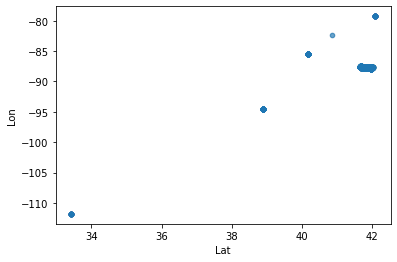

In [63]:
mosquito_df.plot(kind = 'scatter', x = 'Lat', y = 'Lon', alpha = 0.1)
plt.show()

The data was mostly collected in Lat above 35 and Lon above -100, except for a few data points which are below 34 and -110. 

Let's quickly take a look at the distribution of categorical variables in the data. 

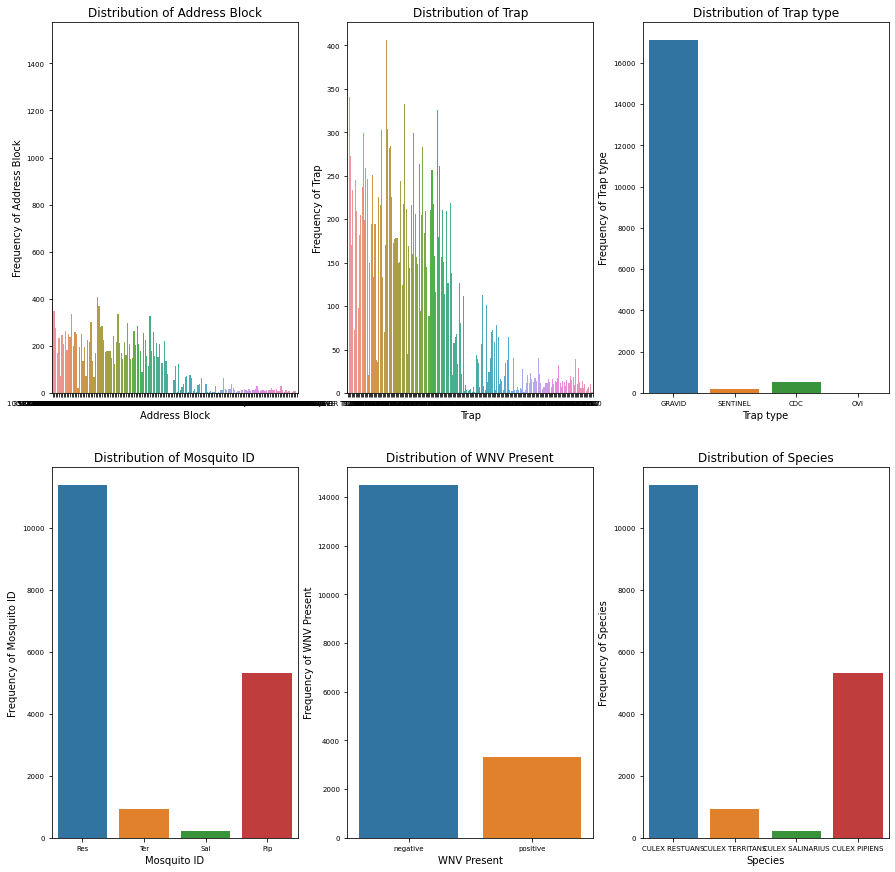

In [78]:
categorical = mosquito_df.select_dtypes(include = ['object']).columns
plt.subplots(2, 3, figsize = (15, 15))
counter = 1
for col in list(categorical):
    plt.subplot(2, 3, counter)
    b= sns.countplot(x = col, data = mosquito_df)
    b.set_title(f"Distribution of {col}")
    b.set_xlabel(f"{col}")
    b.set_ylabel(f"Frequency of {col}")
    b.tick_params(labelsize = 7)
    counter += 1

From the visualization above we see that:
- Both address block and trap variables have too many categories
- The most common trap type is GRAVID
- The most common mosquito, as per Mosquito ID, is Res
- Most moquitoes do not have West Nile Virus present
- The most common species captured is CULEX RESTUANS

After univariate analysis, let's briefly explore the relationship between different variables

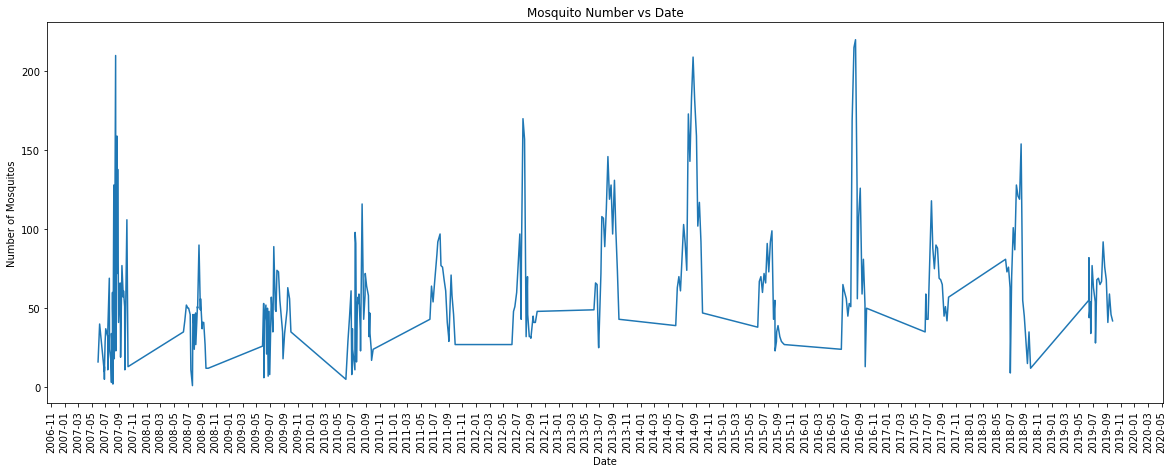

In [97]:
number_dt = mosquito_df.groupby('Date').count()['Mosquito number']
years = mdates.YearLocator()   
months = mdates.MonthLocator(bymonth = range(1,13), interval = 2)  
years_fmt = mdates.DateFormatter('%Y-%m')

fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(x = number_dt.index, y = number_dt.values, markers= "o").set_title("Mosquito Number vs Date")
plt.ylabel("Number of Mosquitos")
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)
plt.xticks(rotation = 'vertical')
plt.show()

The figure above shows that most mosquitoes were captured between July and September!

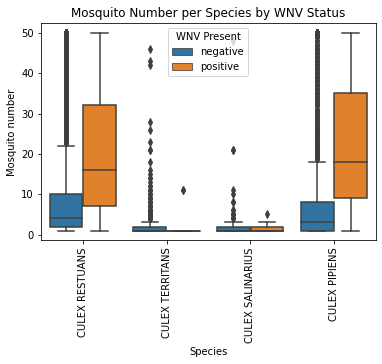

In [107]:
plt.plot()
sns.boxplot(x = 'Species', y = 'Mosquito number', hue = 'WNV Present', data = mosquito_df).set_title("Mosquito Number per Species by WNV Status")
plt.xticks(rotation = 'vertical')
plt.show()

Both CULEX RESTUANS AND CULEX PIPIENS have the greatest numbers of mosquitoes on average, and also most of the WNV positive mosquitoes were in these species!

It is possible to expand our analysis by asking even more questions, but I will stop here. Other question we may ask for further analysis:
- Which trap type caught most mosquitoes on average, and which species did it attract?


Au revoir!!